In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [38]:
#Lendo dataset
dadosvendas= pd.read_csv("data_clean_comtotaldevendas.csv")

In [39]:
dadosvendas.head(10)

,ID,Data,Produto,Categoria,Quantidade,Preco,Total de Vendas
0,1,2023-01-31,Monitor Cardiaco,Eletronicos,28,353.0,9884.0
1,2,2023-07-07,Mochila,Acessorios,34,120.0,4080.0
2,3,2023-06-21,Bicicleta,Equipamento Esportivo,45,2450.0,110250.0
3,4,2023-01-31,Mochila,Acessorios,25,120.0,3000.0
4,5,2023-05-15,Cantil,Acessorios,38,35.0,1330.0
5,6,2023-10-12,Multi-vitaminico,Suplemento,39,89.9,3506.1
6,7,2023-09-12,Calca,Vestuario,41,246.0,10086.0
7,8,2023-02-28,Creatina,Suplemento,25,139.9,3497.5
8,9,2023-10-22,Monitor Cardiaco,Eletronicos,12,353.0,4236.0
9,10,2023-03-23,Camiseta,Vestuario,50,79.9,3995.0


In [40]:
#tratando a coluna data
dadosvendas['Data'] = pd.to_datetime(dadosvendas['Data'])

In [41]:
#criando uma coluna de mês/ano para agrupar as datas
dadosvendas['MesAno'] = dadosvendas['Data'].dt.to_period('M')

In [42]:
#fazendo o total de vendas por mes
vendaspormes = dadosvendas.groupby('MesAno')['Total de Vendas'].sum()

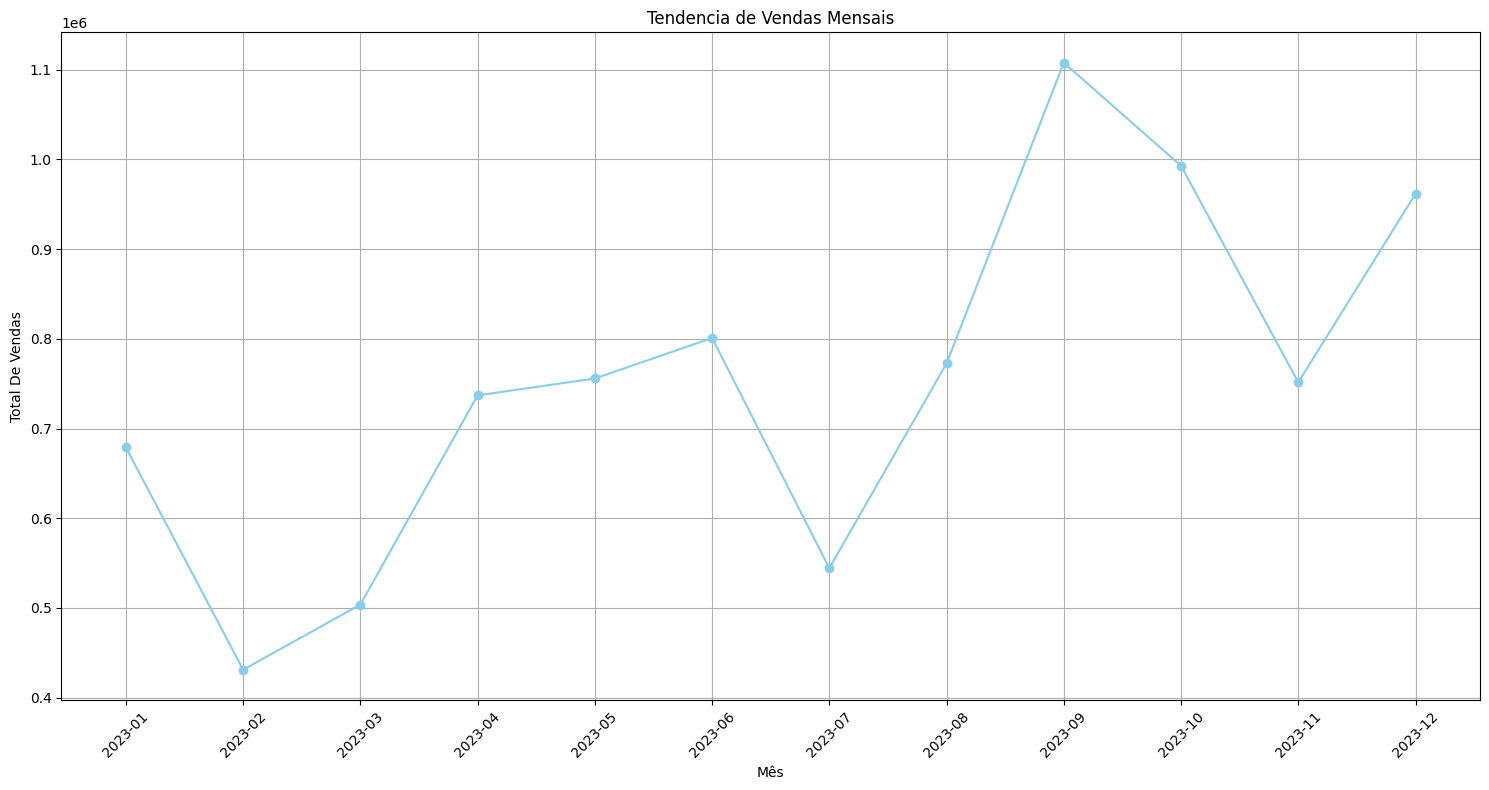

In [43]:
#criando o gráfico de linha
plt.figure(figsize=(15,8))
plt.plot(vendaspormes.index.astype(str), vendaspormes.values, marker='o', color='skyblue')
plt.title('Tendencia de Vendas Mensais')
plt.xlabel('Mês')
plt.ylabel('Total De Vendas')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

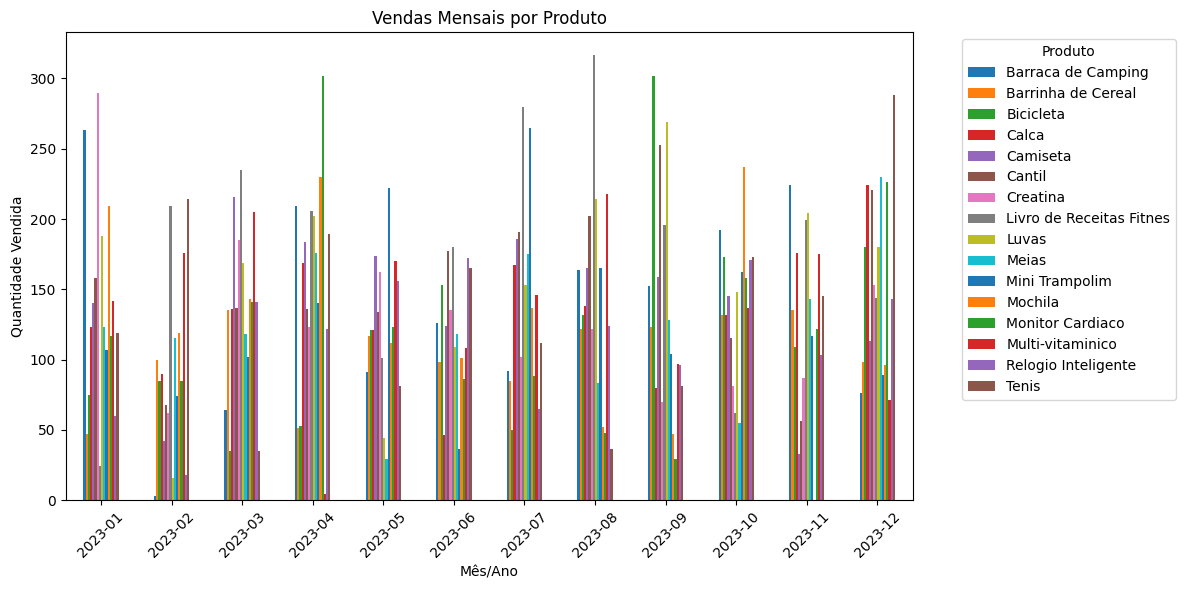

In [45]:
#criando grafico de barras de valor dos produtos por mes

dadosvendas_agrupado = dadosvendas_original.groupby(['MesAno', 'Produto'])['Quantidade'].sum().unstack(fill_value=0)
dadosvendas_agrupado.plot(kind='bar', figsize=(12,6))
plt.title('Vendas Mensais por Produto')
plt.xlabel('Mês/Ano')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.legend(title="Produto", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

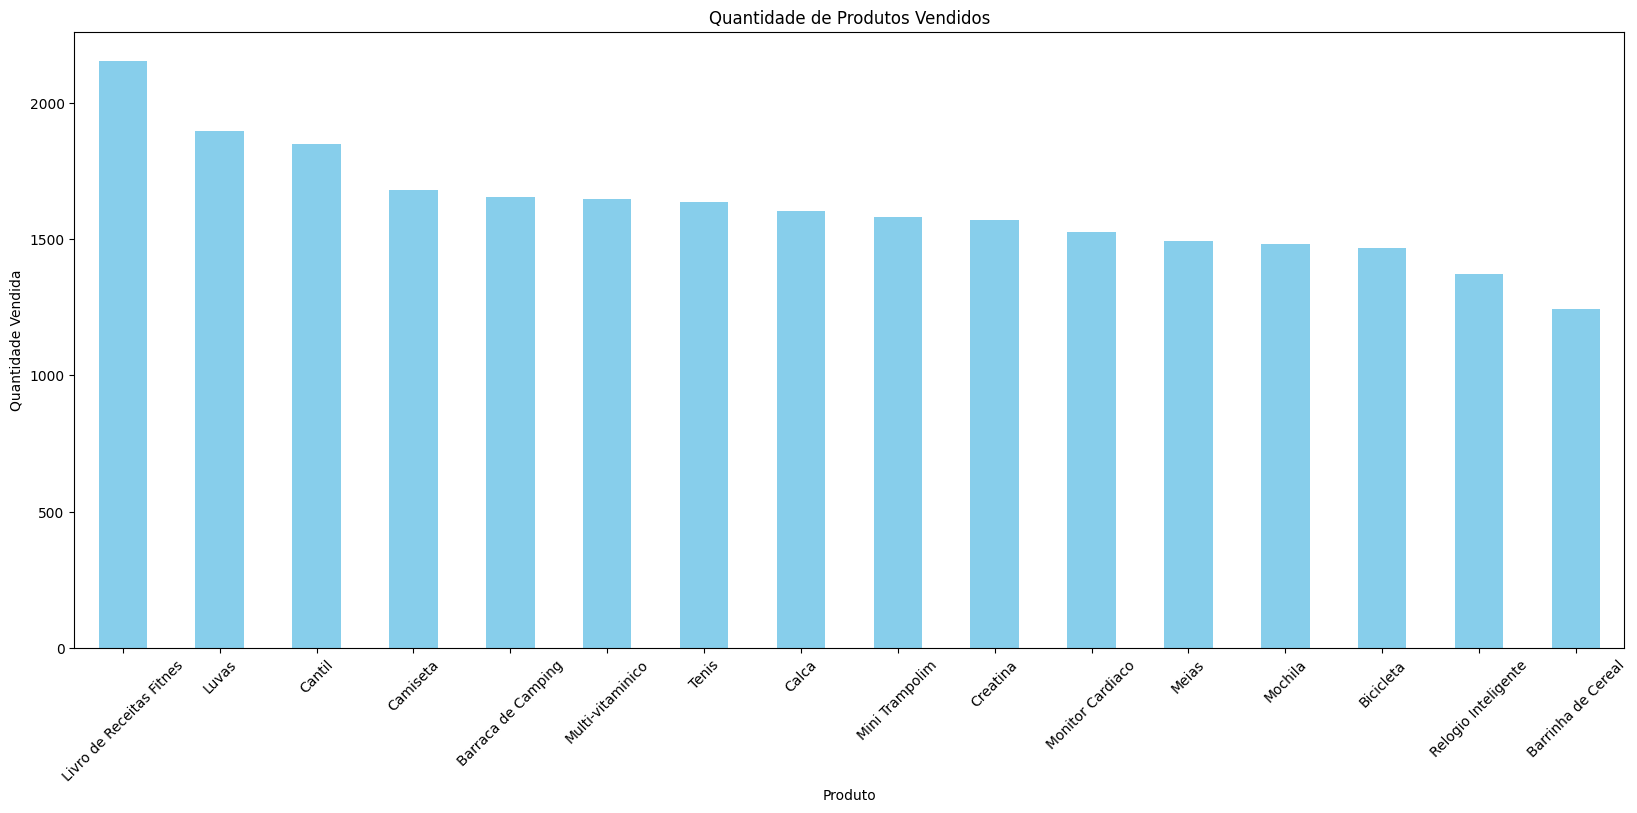

In [46]:
#agrupar a quantidade de produtos vendidos
vendas_produto = dadosvendas.groupby('Produto')['Quantidade'].sum().sort_values(ascending=False)

# gráfico de barras de quantidade de produtos mais vendidos no decorrer do ano
plt.figure(figsize=(20,8))
vendas_produto.plot(kind='bar', color='skyblue')
plt.title('Quantidade de Produtos Vendidos')
plt.xlabel('Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.show()

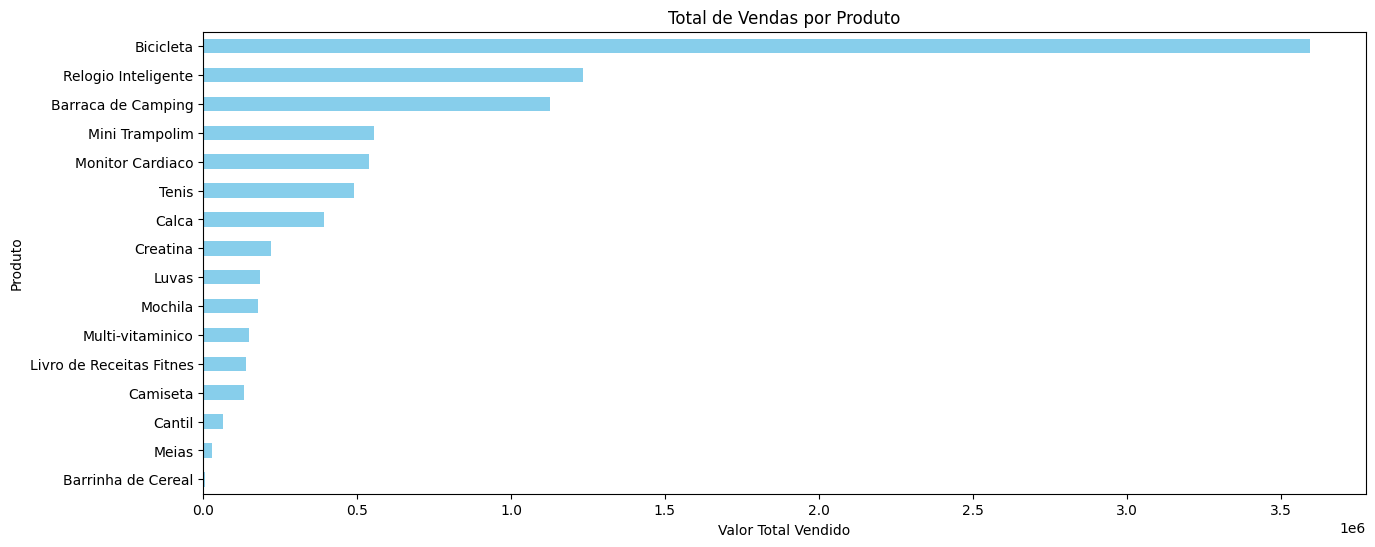

In [47]:
#agrupar a quantidade de produtos vendidos
vendas_produtos = dadosvendas.groupby('Produto')['Total de Vendas'].sum().sort_values(ascending=True)
plt.figure(figsize=(15,6))
vendas_produtos.plot(kind='barh', color='skyblue')
plt.title('Total de Vendas por Produto')
plt.xlabel('Valor Total Vendido')
plt.show()
